In [7]:
import numpy as np 
import astropy.cosmology as co
# -- desi--
import desispec.io as desiIO
# -- FOMOspec -- 
from FOMOspec import util as UT
from FOMOspec import spectra as Spec
from FOMOspec import fitters as Fitters

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
def LgalDESIspec(galid): 
    f_name = 'gal_spectrum_'+str(galid)+'_BGS_template_BC03_Stelib.fits'
    f_outspec = ''.join([UT.dat_dir(), 'Lgal/spectra/', 'desi_out_', f_name])
    return desiIO.read_spectra(f_outspec)

(-10.0, 15.0)

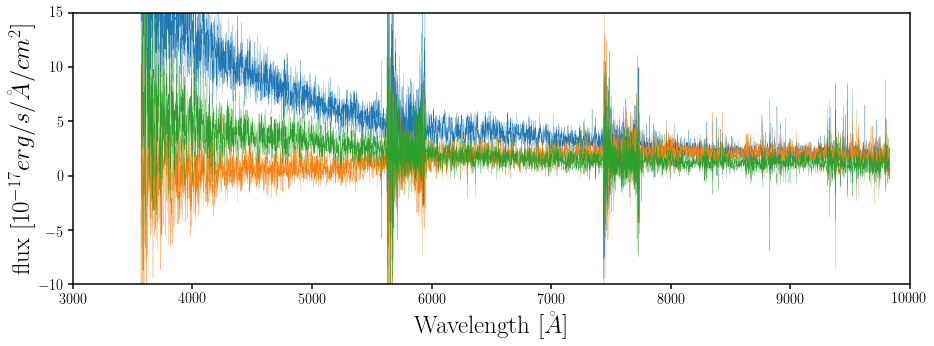

In [4]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
for ii, idd in enumerate([101314, 253044, 10924]): 
    spec_out = LgalDESIspec(idd)

    for iband, band in enumerate(['b', 'r', 'z']): 
        sub.plot(spec_out.wave[band], spec_out.flux[band][0], c='C'+str(ii), lw=0.25)

sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3e3, 1e4])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
sub.set_ylim([-10., 15.])

In [5]:
def firefly_bestfit(galid): 
    spec_out = LgalDESIspec(galid)
    gspec = Spec.GSfirefly()
    gspec.DESIlike(spec_out)
    gspec.path_to_spectrum = UT.dat_dir()
    
    firefly = Fitters.Firefly(gspec,
                          None, # output file 
                          co.Planck13, # comsology
                          models = 'm11', # model ('m11', 'bc03', 'm09') 
                          model_libs = ['MILES'], # model library for M11
                          imfs = ['cha'], # IMF used ('ss', 'kr', 'cha')
                          hpf_mode = 'on', # uses HPF to dereden the spectrum                       
                          age_limits = [0, 15], 
                          Z_limits = [-3., 5.], 
                          wave_limits = [3350., 9000.], 
                          suffix="_SPM-MILES.fits", 
                          downgrade_models = False, 
                          data_wave_medium = 'vacuum', 
                          use_downgraded_models = False, 
                          write_results = False)
    bestfit = firefly.fit_models_to_data()
    return bestfit, firefly

/Users/chang/projects/firefly_release/python/firefly_dust.py:808: RuntimeWarning: divide by zero encountered in divide
  fine_attenuation= (data_flux / best_fit) - (hpf_data/best_fit_hpf) + 1
/Users/chang/projects/firefly_release/python/firefly_dust.py:808: RuntimeWarning: invalid value encountered in divide
  fine_attenuation= (data_flux / best_fit) - (hpf_data/best_fit_hpf) + 1
/Users/chang/projects/firefly_release/python/firefly_library.py:291: RuntimeWarning: divide by zero encountered in double_scalars
  mass_factor[m] 			= data_norm/model_norm[m]
/Users/chang/projects/firefly_release/python/firefly_library.py:292: RuntimeWarning: invalid value encountered in true_divide
  normed_model_flux[m] 	= model_flux[m] / model_norm[m] * data_norm
/Users/chang/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:2637: RuntimeWarning: invalid value encountered in greater
  c = c[(c > critlower) & (c < critupper)]
/Users/chang/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:2

(-10.0, 15.0)

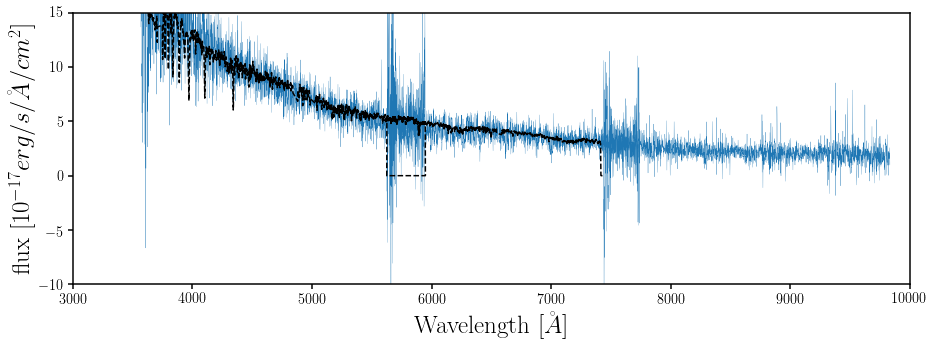

In [8]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
bestfits, fireflies = [], [] 
for ii, idd in enumerate([101314]):#, 253044, 10924]): 
    spec_out = LgalDESIspec(idd)
    bfit, ffly = firefly_bestfit(idd)
    
    for iband, band in enumerate(['b', 'r', 'z']): 
        sub.plot(spec_out.wave[band], spec_out.flux[band][0], c='C'+str(ii), lw=0.25)
    sub.plot(bfit['wavelength'], bfit['flux_bestfit'], c='k', ls='--', label='FIREFLY best-fit')
    bestfits.append(bfit)
    fireflies.append(ffly)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3e3, 1e4])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
sub.set_ylim([-10., 15.])

(-5.0, 20.0)

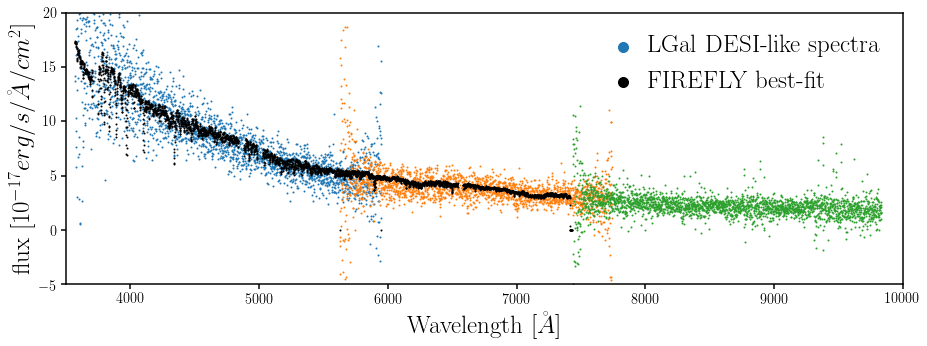

In [16]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
spec_out = LgalDESIspec(101314)
bfit = bestfits[0] 
ffly = fireflies[0]
for iband, band in enumerate(['b', 'r', 'z']): 
    lbl = None
    if iband == 0: lbl = 'LGal DESI-like spectra'
    sub.scatter(spec_out.wave[band], spec_out.flux[band][0], c='C'+str(iband), s=1, label=lbl)
sub.scatter(bfit['wavelength'], bfit['flux_bestfit'], c='k', s=1, label='FIREFLY best-fit')
sub.legend(loc='upper right', markerscale=10, handletextpad=0., fontsize=25)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([3.5e3, 1e4])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
sub.set_ylim([-5., 20.])

(-5.0, 20.0)

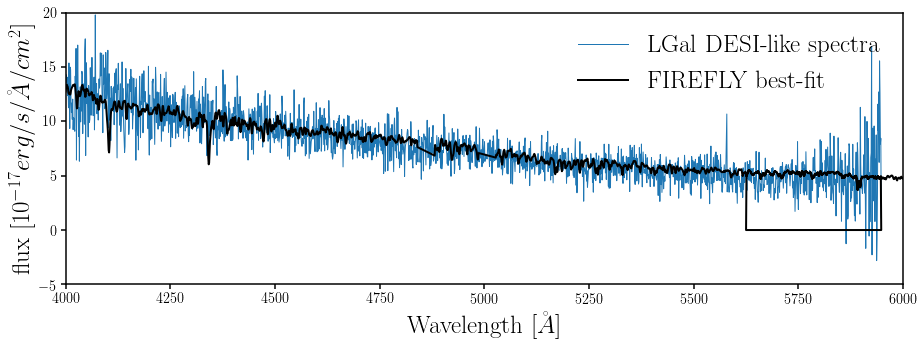

In [24]:
fig = plt.figure(figsize=(15,5)) 
sub = fig.add_subplot(111)
spec_out = LgalDESIspec(101314)
bfit = bestfits[0] 
ffly = fireflies[0]
for iband, band in enumerate(['b']):#, 'r', 'z']): 
    lbl = None
    if iband == 0: lbl = 'LGal DESI-like spectra'
    sub.plot(spec_out.wave[band], spec_out.flux[band][0], c='C'+str(iband), lw=1, label=lbl)
sub.plot(bfit['wavelength'], bfit['flux_bestfit'], c='k', lw=2, label='FIREFLY best-fit')
sub.legend(loc='upper right', fontsize=25)
sub.set_xlabel('Wavelength [$\AA$]', fontsize=25)
sub.set_xlim([4e3, 6e3])
sub.set_ylabel('flux [$10^{-17} erg/s/\AA/cm^2$]', fontsize=25)
sub.set_ylim([-5., 20.])

In [26]:
bfit['properties']

{'EBV': 0.0,
 'IMF': 'Chabrier',
 'Model': 'MILES',
 'SFR_ssp_0': -9999,
 'SFR_ssp_1': -9999,
 'Zmax': 5.0,
 'Zmin': -3.0,
 'ageMax': 15,
 'ageMin': 0,
 'age_lightW': -1.525252218165961,
 'age_lightW_low_1sig': -1.525252218165961,
 'age_lightW_low_2sig': -1.525252218165961,
 'age_lightW_low_3sig': -1.525252218165961,
 'age_lightW_up_1sig': -0.03806114954408635,
 'age_lightW_up_2sig': 0.11033764317623788,
 'age_lightW_up_3sig': 0.11033764317623788,
 'age_massW': -1.525252218165961,
 'age_massW_low_1sig': -1.525252218165961,
 'age_massW_low_2sig': -1.525252218165961,
 'age_massW_low_3sig': -1.525252218165961,
 'age_massW_up_1sig': 1.0815002020065718,
 'age_massW_up_2sig': 1.1321599598885146,
 'age_massW_up_3sig': 1.1395677774750574,
 'living_stars_mass': -9999,
 'living_stars_mass_ssp_0': -9999,
 'living_stars_mass_ssp_1': -9999,
 'log_age_ssp_0': -2.0969100130080562,
 'log_age_ssp_1': -2.1870866433571443,
 'mass_of_ejecta': -9999,
 'mass_of_ejecta_ssp_0': -9999,
 'mass_of_ejecta_ssp_1':

In [28]:
ffly.best_fit_index

[10683]